<a href="https://colab.research.google.com/github/marcusvbastos/Treinamento-da-Rede-YOLO/blob/main/Treinamento_da_Rede_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imagem baixada: test_image.jpg
Formato da imagem: JPEG
Tamanho da imagem: (620, 465)
PRO TIP 💡 Replace 'model=yolov5s.pt' with new 'model=yolov5su.pt'.
YOLOv5 'u' models are trained with https://github.com/ultralytics/ultralytics and feature improved performance vs standard YOLOv5 models trained with https://github.com/ultralytics/yolov5.

Realizando detecção de pessoas e cachorros...

0: 480x640 4 persons, 6 cars, 1 dog, 2 handbags, 1 potted plant, 448.0ms
Speed: 4.9ms preprocess, 448.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


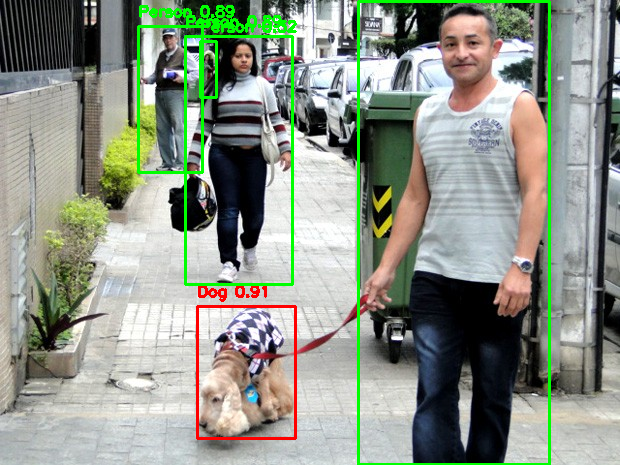

Pessoas detectadas: 4
Cachorros detectados: 1
Detecção concluída!


In [15]:
!pip install ultralytics

import torch
import cv2
import numpy as np
from PIL import Image
from IPython.display import display
import time
import requests
from io import BytesIO


from ultralytics import YOLO


def download_and_process_image(url, filename):
    response = requests.get(url)
    if response.status_code == 200:

        with open(filename, 'wb') as f:
            f.write(response.content)
        print(f"Imagem baixada: {filename}")


        try:
            with Image.open(BytesIO(response.content)) as img:
                print(f"Formato da imagem: {img.format}")
                print(f"Tamanho da imagem: {img.size}")
            return True
        except Exception as e:
            print(f"Erro ao abrir a imagem: {e}")
            return False
    else:
        print(f"Falha ao baixar a imagem: {response.status_code}")
        return False


def detect_and_display(model, image_path):
    try:

        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


        results = model(img)


        people_count = 0
        dog_count = 0


        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy().astype(int)
            classes = result.boxes.cls.cpu().numpy().astype(int)
            confidences = result.boxes.conf.cpu().numpy()

            for box, cls, conf in zip(boxes, classes, confidences):

                if cls in [0, 16]:
                    x1, y1, x2, y2 = box
                    if cls == 0:
                        label = f'Person {conf:.2f}'
                        color = (0, 255, 0)
                        people_count += 1
                    else:
                        label = f'Dog {conf:.2f}'
                        color = (255, 0, 0)
                        dog_count += 1
                    cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
                    cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)


        display(Image.fromarray(img))

        print(f"Pessoas detectadas: {people_count}")
        print(f"Cachorros detectados: {dog_count}")

    except Exception as e:
        print(f"Erro ao processar a imagem: {e}")


image_url = "https://s2.glbimg.com/QgrsWI9WacEIc0a0mGbCdMvi8ZQEdQlNIT1EZSV4wqBIoz-HdGixxa_8qOZvMp3w/s.glbimg.com/jo/g1/f/original/2012/07/24/passeio_cachorros.jpg"
image_filename = "test_image.jpg"


if download_and_process_image(image_url, image_filename):

    model = YOLO('yolov5s.pt')

    print("Realizando detecção de pessoas e cachorros...")
    detect_and_display(model, image_filename)

    print("Detecção concluída!")
else:
    print("Não foi possível baixar ou processar a imagem.")
